# A brief guide to the python visualizatiion landscape
### Mike Schaid PhD

the purpose of this post is not a tutorial, although good practice is to review the code used. The purpose is to provide a "roadmap" of sorts to visualization packages and provide new python users a tool kit for easy decion making when it comes to visualizing data. We'll use an already cleaned dataset from Kaggle. We'll save the traditional datascience workflow for another post, and get right into visualization. 

* background on MPL
* the fundmental plotting package
* all static packages are just wrappers for matplotlib
* despite its complexity, it is worth getting a basic understanding

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotnine 

Diabetes dataset available here
https://www.kaggle.com/datasets/mathchi/diabetes-data-set

or on my github 
https://github.com/Mschaid/Blog/tree/main/dataviz


In [5]:
data = pd. read_csv('/Users/michaelschaid/GitHub/Blog/dataviz/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Matplot lib allows for quick, but realtively unattractive plots. They arent hiddeous, but they are stock. Thats intentional, as the power truly lies in the ability to control every feature of the plot. We can go from this:


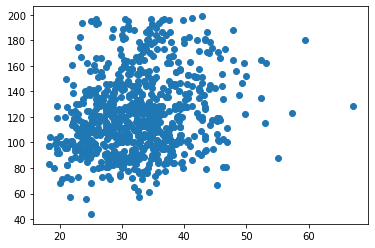

In [6]:
filtered_data=data[(data.BMI != 0) & (data.Glucose != 0)]
plt.scatter(x=filtered_data['BMI'], y=filtered_data['Glucose'])

to this:
> highlight that some of code is unitentially repetitive so you can get an idea for whats going on. We will cover effiecnt matplot lib plotting in another post

>  spolier alert, you can use write custom functions for clean code, from a programming perspective this is the correct way to do 

Text(0, 0.5, 'Blood glucose (ng/dL)')

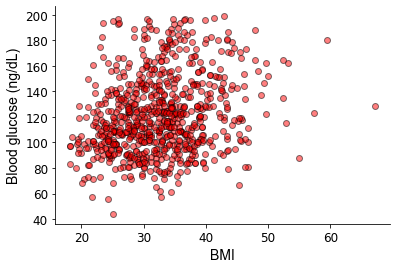

In [29]:
fig, ax = plt.subplots()

plt.scatter(x=filtered_data['BMI'],
            y=filtered_data['Glucose'],
            color='red',  
            edgecolor='black', 
            alpha=0.5)

#remove unwated top and right spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# increase font size of tick labels
ax.tick_params(axis='both', labelsize=12)

# set x and y labels
ax.set_xlabel('BMI',font = "Arial", fontsize=14)
ax.set_ylabel('Blood glucose (ng/dL)', font = "Arial", fontsize=14)


great. This looks like something we might see in a paper, or at least is attractive enough we would be ok showing our collegues, but this is one plot. This isnt exactly proficient for visualizing our data quickly, and in way that we are comfortable sharing. Personally, I reserve matplot lib for making figures for maniscripts and journal articles. What about large datasets, with a lot of features that we want to see quickly, or basic statisical plots? This is exactly what seaborn was developed for. Lets make the same scatter plot and expand on it with seaborn. 

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

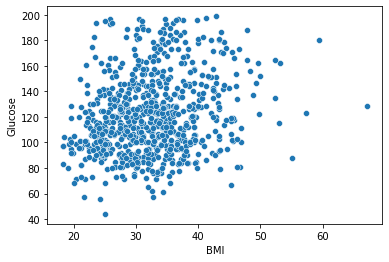

In [43]:
sns.scatterplot(x='BMI', y='Glucose', data=filtered_data)

you can see at baseline its kind of 'good enough', if we just wanted to show our collegues and move on. but there are some really powerful methods we can use to visualize our data quckly. With seaborn, we get abbreviatged syntax, easy group segregation with the 'Hue' feature (for group color)and quick plots that look good. 

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

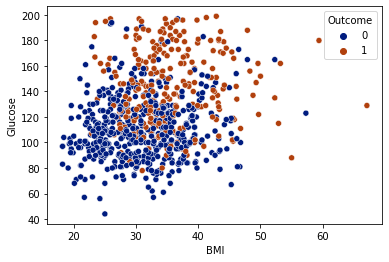

In [42]:
sns.scatterplot(data=filtered_data, x='BMI', y='Glucose', hue='Outcome', palette='dark')

The thing is, as mentioned, seaborn is running matplot lib in the background so we still have full control with matplotlib attributes. Using the same custimzations as the matplotlib scatter plot we made earlier:

Text(0, 0.5, 'Blood glucose (ng/dL)')

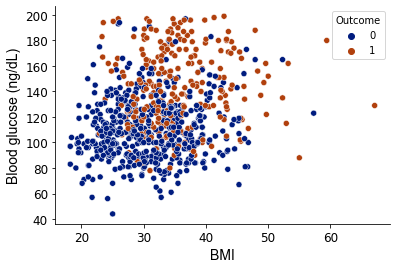

In [44]:
fig, ax = plt.subplots()

sns.scatterplot(data=filtered_data, x='BMI', y='Glucose', hue='Outcome', palette='dark', ax=ax)
#remove unwated top and right spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# increase font size of tick labels
ax.tick_params(axis='both', labelsize=12)

# set x and y labels
ax.set_xlabel('BMI',font = "Arial", fontsize=14)
ax.set_ylabel('Blood glucose (ng/dL)', font = "Arial", fontsize=14)

We could make this exact plot in MPL, but it would require substantial more lines of code.Where matplot lib truly shines is is complex statistical plots and ease 

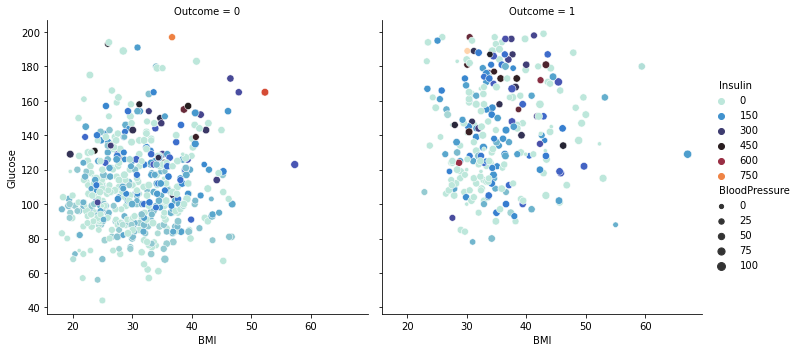

In [72]:

sns.relplot(x='BMI', y='Glucose', data=filtered_data, col='Outcome', hue='Insulin', palette='icefire',size='BloodPressure')

In [ ]:
fig = plt.figure(constrained_layout=True)

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0,0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-2])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])
ax6= fig.add_subplot(gs[1,1])
ax7= fig.add_subplot(gs[:,-1])

fig.suptitle("GridSpec")


In [57]:
filtered_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
